In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk as nltk
#Read data frame from data2.csv
df = pd.read_csv('data2.csv', encoding='ISO-8859-1')
df.head()



,Clothing ID,Age,Title,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text,Rating
0,767,33,NaN,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,4
1,1080,34,NaN,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,5
2,1077,60,Some major design flaws,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,3
3,1049,50,My favorite buy!,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...",5
4,847,47,Flattering shirt,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,5


In [4]:
X = df['Review Text'].values.astype('U')
y = df['Rating']


In [8]:
pos = df.loc[df['Rating'] > 3, 'Review Text'].copy().reset_index(drop=True)
neg = df.loc[df['Rating'] <= 3, 'Review Text'].copy().reset_index(drop=True)
len(pos), len(neg)

(18208, 5278)

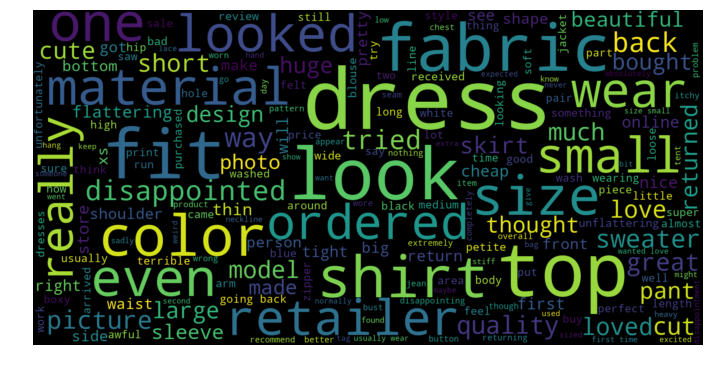

In [11]:
neg_tweets = df[df.Rating == 1] 
neg_string = []

for t in neg_tweets['Review Text']:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

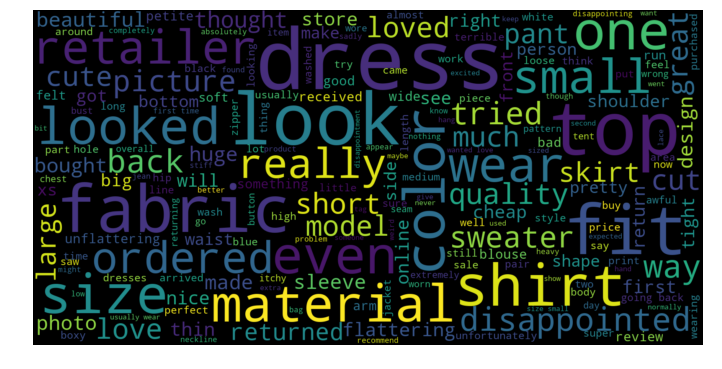

In [12]:
pos_tweets = df[df.Rating == 5] 
pos_string = []
for t in pos_tweets['Review Text']:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def text_process(text):

    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Using Stemming
    3. Return the cleaned text as a list of words
    '''

    nopunc = [char for char in text if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [porter.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [14]:
sample_text = "I ,have ,!been waiting  fishing for this sweater coat to ship for weeks! i was so excited for it to arrive."

print(text_process(sample_text))

['wait', 'fish', 'sweater', 'coat', 'ship', 'week', 'excit', 'arriv']


In [15]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [16]:
X = bow_transformer.transform(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
preds = nb.predict(X_test)

# Classification Report and Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[   6   20   83   15   31]
 [   5   18  162   82   63]
 [   4    6  213  195  131]
 [   2    4   82  368  583]
 [   2    4   34  258 2327]]


             precision    recall  f1-score   support

          1       0.32      0.04      0.07       155
          2       0.35      0.05      0.09       330
          3       0.37      0.39      0.38       549
          4       0.40      0.35      0.38      1039
          5       0.74      0.89      0.81      2625

avg / total       0.58      0.62      0.59      4698



# Accesing Review Text Index 26

In [60]:
review = df['Review Text'].values.astype('U')[10]
review

'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'

# Predict Review text index 26

In [61]:
positive_review_transformed = bow_transformer.transform([review])

nb.predict(positive_review_transformed)[0]

3

# Predicting Costum Text Based on our Bag of Words

In [74]:
reviews_array = np.array(["I was really hoping to like this, but it did not look the way it does on the model, at least not on me. the sharkbite hem is much more pronounced and looser. the one in the photo looks like it"])
review_vector = bow_transformer.transform(reviews_array)
nb.predict(review_vector)[0]

3

In [75]:
def predict_review(text):
    reviews_array = np.array([text])
    review_vector = bow_transformer.transform(reviews_array)

    return nb.predict(review_vector)[0]

In [82]:
print(predict_review("Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back."))

3


In [63]:
import pickle
pickle.dump(_, open("model.pkl","wb"))